In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../Datasets/9-email_classification_svm.csv")
df

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1
...,...,...,...
995,-1.903223,-1.109747,1
996,-0.798307,0.851320,0
997,-1.369750,1.022278,0
998,-1.185039,-1.202666,1


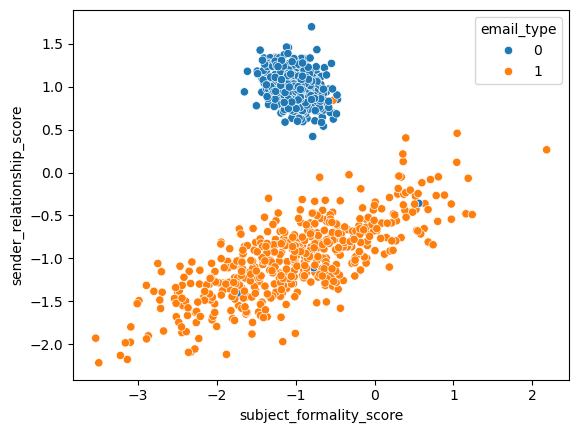

In [4]:
sns.scatterplot(x=df["subject_formality_score"],y=df["sender_relationship_score"],hue=df["email_type"])
plt.show()

In [6]:
X = df.drop("email_type",axis=1)
y = df["email_type"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")

In [9]:
svc.fit(X_train,y_train)
y_preds = svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]


In [11]:
df = pd.read_csv("../Datasets/9-loan_risk_svm.csv")
df

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1
...,...,...,...
995,-0.703085,0.760777,1
996,1.042496,-1.257339,0
997,-0.187788,1.261660,1
998,-0.661871,-0.540731,0


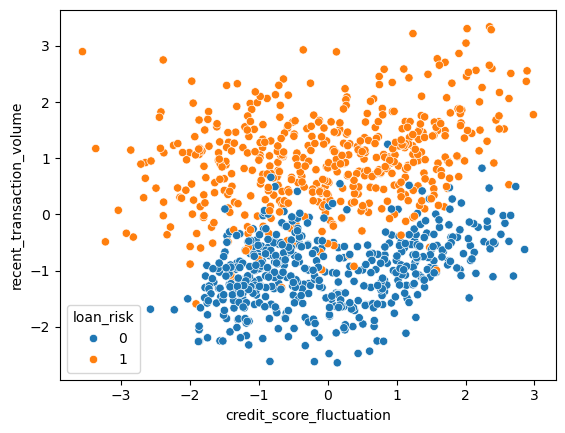

In [12]:
sns.scatterplot(x=df["credit_score_fluctuation"],y=df["recent_transaction_volume"],hue=df["loan_risk"])
plt.show()

In [13]:
X = df.drop("loan_risk",axis=1)
y=df["loan_risk"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [14]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)
y_preds = linear.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.93      0.91      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109   9]
 [ 12 120]]


In [16]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_preds = rbf.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.91      0.94      0.93       126

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113  11]
 [  8 118]]


In [17]:
poly = SVC(kernel="poly")
poly.fit(X_train,y_train)
y_preds = poly.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       115
           1       0.94      0.90      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107   8]
 [ 14 121]]


In [18]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_preds = sigmoid.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       118
           1       0.84      0.83      0.84       132

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  20]
 [ 23 109]]


In [21]:
param_grid = {"C":[0.1,1,10,100,1000],
"kernel":["rbf"],
"gamma":["scale","auto"]}

In [23]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)

In [24]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [25]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [26]:
y_preds = grid.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       122
           1       0.92      0.93      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112  10]
 [  9 119]]


In [27]:
df = pd.read_csv("../Datasets/9-seismic_activity_svm.csv")
df

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0
...,...,...,...
395,-4.170824,-2.757576,1
396,-4.130115,-2.818182,1
397,-4.088102,-2.878788,1
398,-4.044745,-2.939394,1


In [29]:
# 3 boyutlu ayrım gerekiyor 'rbf' otomatik yapar

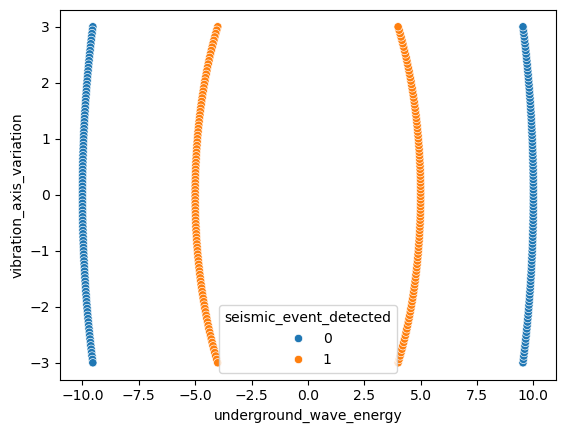

In [28]:
sns.scatterplot(x=df["underground_wave_energy"],y=df["vibration_axis_variation"],hue=df["seismic_event_detected"])
plt.show()

In [31]:
X = df.drop("seismic_event_detected",axis=1)
y = df["seismic_event_detected"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)
svc = SVC(kernel="rbf")
svc.fit(X_train,y_train)
y_preds = svc.predict(X_test)
print(classification_report(y_preds,y_test))
print(confusion_matrix(y_preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]
